<a href="https://colab.research.google.com/github/ParthDave111/Learnings-/blob/main/K_Mean_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import yfinance as yf
import pandas as pd

tickers = ['AAPL', 'BA', 'WMT']
data = yf.download(tickers, start='2015-01-01', end='2024-12-31')
# Check if 'Adj Close' is in the columns:
if 'Adj Close' in data.columns:
    data = data['Adj Close']
# If not, try 'Close' as the column name:
else:
    data = data['Close']
print(data.head())
data = data.dropna()
returns = data.pct_change().dropna()

[*********************100%***********************]  3 of 3 completed

Ticker           AAPL          BA        WMT
Date                                        
2015-01-02  24.347176  113.657219  23.441484
2015-01-05  23.661280  112.870064  23.373266
2015-01-06  23.663496  111.540627  23.553373
2015-01-07  23.995308  113.272392  24.178295
2015-01-08  24.917271  115.275276  24.688614


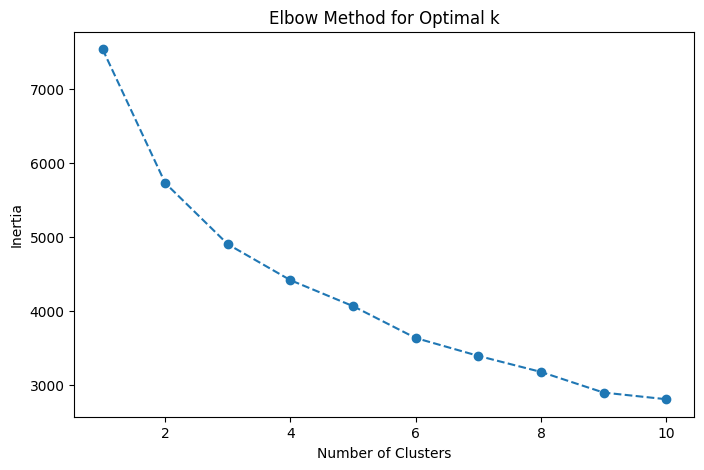

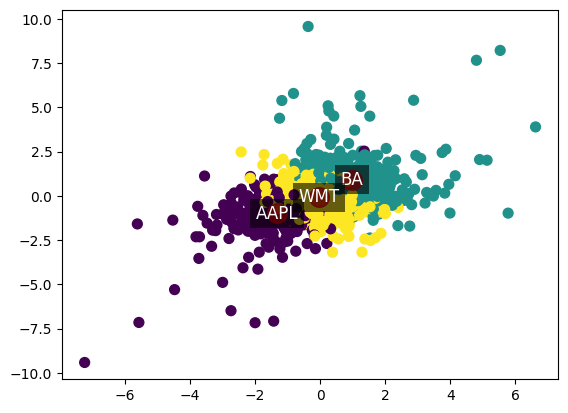

In [4]:
# Normalize the data
scaler = StandardScaler()
normalized_returns = scaler.fit_transform(returns)

inertia = []
range_clusters = range(1, 11)
for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_returns)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range_clusters, inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

X = normalized_returns

kmeans = KMeans(n_clusters=3, random_state=0)
y_kmeans = kmeans.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75)

for i, center in enumerate(centers):
    plt.text(center[0], center[1], f'{tickers[i]}', fontsize=12, ha='center', va='center', color='white',
             bbox=dict(facecolor='black', alpha=0.6, edgecolor='none'))

plt.show()

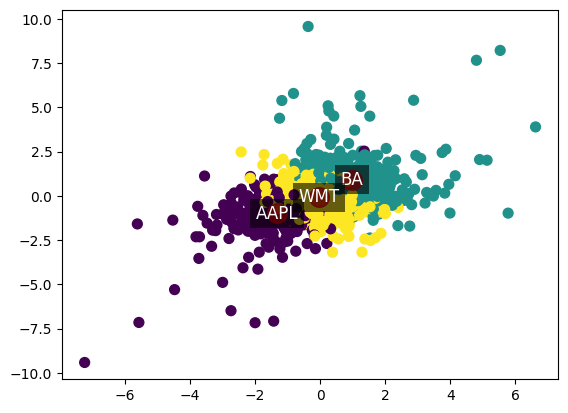

In [5]:
X = normalized_returns

kmeans = KMeans(n_clusters=3, random_state=0)
y_kmeans = kmeans.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75)
for i, center in enumerate(centers):
    plt.text(center[0], center[1], f'{tickers[i]}', fontsize=12, ha='center', va='center', color='white',
             bbox=dict(facecolor='black', alpha=0.6, edgecolor='none'))

plt.show()